In [1]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [2]:
dataset = pd.read_csv('credit_score.csv')

In [3]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


## Exploratory Data Analysis (EDA)

In [4]:
dataset.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

#### features that should be numeric: Month, Age, Num_of_Loan, Outstanding_Debt, Annual_Income, Amount_invested_monthly, Monthly_Balance, Num_of_Delayed_Payment, Changed_Credit_Limit

In [5]:
dataset.Month = pd.to_datetime(dataset.Month,format="%B").dt.month
dataset.Month = dataset.Month.astype('int64')

In [6]:
num_cols=['Age','Num_of_Loan']
for col in num_cols:
    print(col)
    dataset[col] = dataset[col].str.extract('(\d+)').astype('int64')

Age
Num_of_Loan


In [7]:
num_cols=['Outstanding_Debt','Annual_Income','Amount_invested_monthly','Monthly_Balance','Num_of_Delayed_Payment','Changed_Credit_Limit']
for col in num_cols:
    print(col)
    dataset[col] = dataset[col].str.extract('(\d+)').astype('float')

Outstanding_Debt
Annual_Income
Amount_invested_monthly
Monthly_Balance
Num_of_Delayed_Payment
Changed_Credit_Limit


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

#### dropping columns that have too much unique values

In [9]:
print('Name:',len(dataset.Name.unique()))
print('SSN:', len(dataset.SSN.unique()))
print('Customer_ID:',len(dataset.Customer_ID.unique()))
print('ID:', len(dataset.ID.unique()))
print('Credit_History_Age:', len(dataset.Credit_History_Age.unique()))


Name: 10140
SSN: 12501
Customer_ID: 12500
ID: 100000
Credit_History_Age: 405


In [10]:
dataset = dataset.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Credit_History_Age' ], axis = 1)
dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,_,809.0,26.822620,No,49.574949,80.0,High_spent_Small_value_payments,312.0,Good
1,2,23,Scientist,19114.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.0,31.944960,No,49.574949,118.0,Low_spent_Large_value_payments,284.0,Good
2,3,500,Scientist,19114.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.0,28.609352,No,49.574949,81.0,Low_spent_Medium_value_payments,331.0,Good
3,4,23,Scientist,19114.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.0,31.377862,No,49.574949,199.0,Low_spent_Small_value_payments,223.0,Good
4,5,23,Scientist,19114.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.0,24.797347,No,49.574949,41.0,High_spent_Medium_value_payments,341.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,Mechanic,39628.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.0,34.663572,No,35.104023,60.0,High_spent_Large_value_payments,NaN,Poor
99996,5,25,Mechanic,39628.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,_,502.0,40.565631,No,35.104023,54.0,High_spent_Medium_value_payments,NaN,Poor
99997,6,25,Mechanic,39628.0,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,3.0,Good,502.0,41.255522,No,35.104023,24.0,High_spent_Large_value_payments,NaN,Poor
99998,7,25,Mechanic,39628.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,3.0,Good,502.0,33.638208,No,35.104023,251.0,Low_spent_Large_value_payments,NaN,Standard


#### method for replacing empty cells by the median value

In [11]:
def fill_missing_values_by_median(col):
    print(col)
    payment_index = list(~dataset[col].isnull())
    median_payment = np.median(dataset[col].loc[payment_index])
    dataset[col].fillna(median_payment, inplace = True)
    print(median_payment)

#### method for log transforming 

In [12]:
def log_transforming(col):
    print(col)
    modified = [np.log(el) if el > 0 else 0 for el in dataset[col]]
    dataset[col] = modified

## Age

Text(0.5, 1.0, 'Age Distribution')

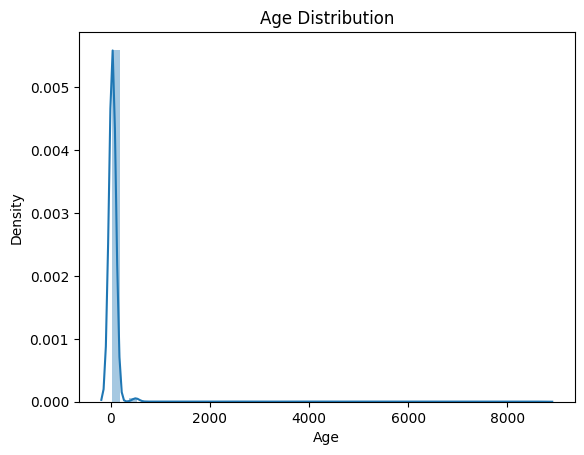

In [13]:
sns.distplot(dataset['Age'])
plt.title('Age Distribution')

#### there are obvious outliers. let us drop values higher then 100

In [14]:
dataset = dataset[dataset['Age']<=100]
dataset = dataset.reset_index(drop=True)

Text(0.5, 1.0, 'Age Distribution')

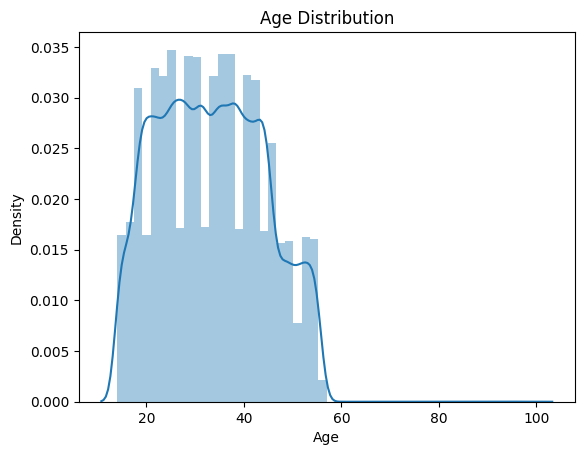

In [15]:
sns.distplot(dataset['Age'])
plt.title('Age Distribution')

## Monthly_Inhand_Salary

#### Monthly Inhand Salary distribution by Credit Score

Text(0.5, 1.0, 'Customer Monthly Inhand Salary by Credit Score')

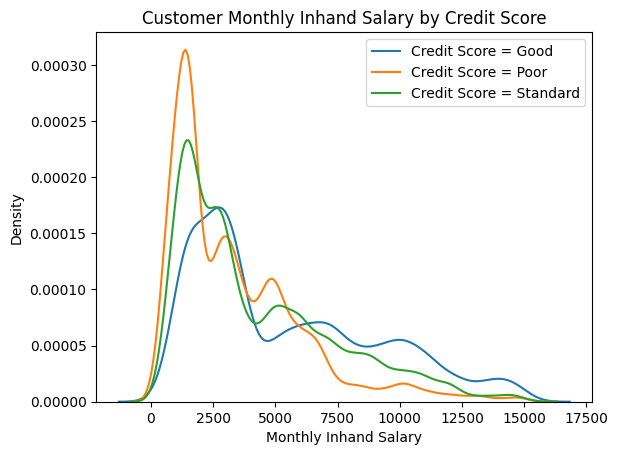

In [16]:
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(dataset['Monthly_Inhand_Salary'][dataset['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')

#### finding the mean value of the Monthly_Inhand_Salary depending of Credit_Score

In [17]:
salary_good_mean = np.mean(dataset[dataset['Credit_Score'] == 'Good']['Monthly_Inhand_Salary'])
salary_poor_mean = np.mean(dataset[dataset['Credit_Score'] == 'Poor']['Monthly_Inhand_Salary'])
salary_standard_mean = np.mean(dataset[dataset['Credit_Score'] == 'Standard']['Monthly_Inhand_Salary'])
(salary_good_mean, salary_poor_mean, salary_standard_mean)

(5392.787348962568, 3380.2159090779874, 4240.961691458348)

#### replacing the missing values in the Monthly_Inhand_Salary depending of Credit_Score type

In [18]:
index_values = list(dataset['Monthly_Inhand_Salary'].isnull())

for index in range(len(dataset)):
    if index_values[index]:
        if dataset['Credit_Score'][index] == 'Good':
            dataset['Monthly_Inhand_Salary'][index] = salary_good_mean
        elif dataset['Credit_Score'][index] == 'Poor':
            dataset['Monthly_Inhand_Salary'][index] = salary_poor_mean
        else:
            dataset['Monthly_Inhand_Salary'][index] = salary_standard_mean

## Type_of_Loan

In [19]:
dataset['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [20]:
len(dataset['Type_of_Loan'].unique())

6261

#### create a dictionary to store the counts of all the various Type_of_Loan:

In [21]:
index_values = ~dataset['Type_of_Loan'].isnull().values
loan_type_data = list(dataset['Type_of_Loan'][index_values])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specifie

In [22]:
loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 36926,
 'Credit-Builder Loan': 39356,
 'Personal Loan': 37836,
 'Home Equity Loan': 38027,
 'Not Specified': 38472,
 'Mortgage Loan': 37866,
 'Student Loan': 37888,
 'Debt Consolidation Loan': 37717,
 'Payday Loan': 39416}

#### create new 8 columns for every value of Type_of_Loan columns (without Not Specified)

In [23]:
empty_array = [0] * (len(dataset))

In [24]:
auto_loan = empty_array
credit_builder_loan = empty_array
personal_loan = empty_array
home_equity_loan = empty_array
mortgage_loan = empty_array
student_loan = empty_array
debt_consolidation_loan = empty_array
payday_loan = empty_array

In [25]:
for index in range(len(loan_type_data)):
    if 'Auto' in loan_type_data[index]:
        auto_loan[index] = 1
    
    if 'Credit-Builder' in loan_type_data[index]:
        credit_builder_loan[index] = 1
        
    if 'Personal' in loan_type_data[index]:
        personal_loan[index] = 1
    
    if 'Home' in loan_type_data[index]:
        home_equity_loan[index] = 1
    
    if 'Mortgage' in loan_type_data[index]:
        mortgage_loan[index] = 1
    
    if 'Student' in loan_type_data[index]:
        student_loan[index] = 1
        
    if 'Debt' in loan_type_data[index]:
        debt_consolidation_loan[index] = 1
    
    if 'Payday' in loan_type_data[index]:
        payday_loan[index] = 1

In [26]:
dataset['Auto_Loan'] = auto_loan
dataset['Credit_Builder_Loan'] = credit_builder_loan
dataset['Personal_Loan'] = personal_loan
dataset['Home_Enquity_Loan'] = home_equity_loan
dataset['Mortgage_Loan'] = mortgage_loan
dataset['Student_Loan'] = student_loan
dataset['Debt_Consolidation_Loan'] = debt_consolidation_loan
dataset['Payday_Loan'] = payday_loan
dataset['Payday_Loan'] = payday_loan
dataset.drop(['Type_of_Loan'], axis = 1, inplace = True)

## Num_of_Delayed_Payment

#### fill missing values

In [27]:
fill_missing_values_by_median('Num_of_Delayed_Payment')

Num_of_Delayed_Payment
14.0


## Num_Credit_Inquiries

In [28]:
dataset.Num_Credit_Inquiries.value_counts()

Num_Credit_Inquiries
4.0       10939
3.0        8637
6.0        7896
7.0        7857
2.0        7811
          ...  
1753.0        1
782.0         1
1294.0        1
2597.0        1
74.0          1
Name: count, Length: 1207, dtype: int64

#### delete strings where Num_Credit_Inquiries>100

In [29]:
dataset = dataset[dataset.Num_Credit_Inquiries<100]

#### fill missing values

In [30]:
fill_missing_values_by_median('Num_Credit_Inquiries')

Num_Credit_Inquiries
5.0


## Amount_invested_monthly

#### fill missing values

In [31]:
fill_missing_values_by_median('Amount_invested_monthly')

Amount_invested_monthly
135.0


## Monthly_Balance

#### fill missing values

In [32]:
fill_missing_values_by_median('Monthly_Balance')

Monthly_Balance
336.0


## Num_Bank_Accounts

Text(0.5, 1.0, 'Num_Bank_Accounts Distribution')

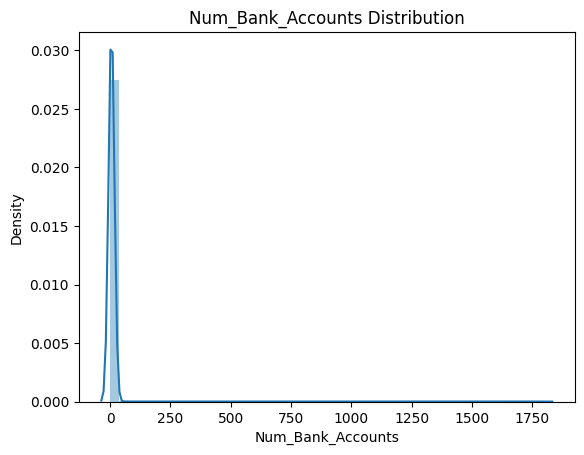

In [33]:
sns.distplot(dataset['Num_Bank_Accounts'])
plt.title('Num_Bank_Accounts Distribution')

In [34]:
dataset.Num_Bank_Accounts.value_counts()

Num_Bank_Accounts
6       12222
7       12024
8       11989
4       11384
5       11372
        ...  
987         1
1626        1
1470        1
211         1
697         1
Name: count, Length: 896, dtype: int64

In [35]:
dataset[dataset.Num_Bank_Accounts>40]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
261,4,44,Writer,58317.0,4240.961691,1414,5,9,6,18,...,407.0,Standard,1,1,1,1,1,1,1,1
301,7,37,Musician,15566.0,1423.168333,67,5,32,4,12,...,308.0,Poor,1,1,1,1,1,1,1,1
329,4,42,_______,20574.0,4240.961691,572,3,14,4,6,...,349.0,Standard,1,1,1,1,1,1,1,1
345,5,19,Musician,85554.0,7185.502500,1488,2,3,100,14,...,887.0,Good,1,1,1,1,1,1,1,1
732,5,33,Musician,14205.0,1086.757500,91,10,21,8,36,...,265.0,Standard,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96828,8,29,Mechanic,17013.0,1326.774167,813,1,10,1,6,...,336.0,Good,0,0,0,0,0,0,0,0
96874,7,25,Developer,125271.0,10374.330000,1481,7,1,4,10,...,336.0,Poor,0,0,0,0,0,0,0,0
96902,3,31,Lawyer,146310.0,12124.556667,474,4,9,1,3,...,336.0,Standard,0,0,0,0,0,0,0,0
96957,3,53,Architect,36817.0,3198.161667,697,4,5,3,7,...,336.0,Standard,0,0,0,0,0,0,0,0


#### delete values where number of bank accounts are higher then 40

In [36]:
dataset = dataset[dataset.Num_Bank_Accounts < 40]

Text(0.5, 1.0, 'Num_Bank_Accounts Distribution')

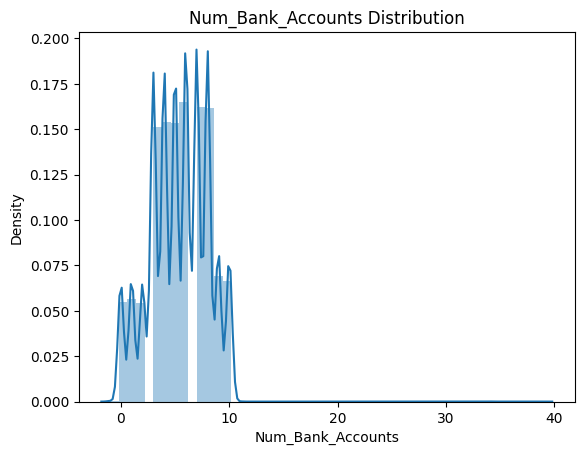

In [37]:
sns.distplot(dataset['Num_Bank_Accounts'])
plt.title('Num_Bank_Accounts Distribution')

## Num_Credit_Card

Text(0.5, 1.0, 'Num_Credit_Card Distribution')

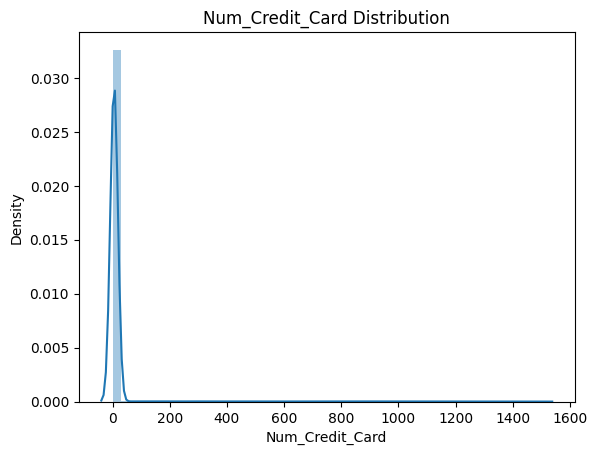

In [38]:
sns.distplot(dataset['Num_Credit_Card'])
plt.title('Num_Credit_Card Distribution')

In [39]:
dataset.Num_Credit_Card.value_counts()

Num_Credit_Card
5       17081
7       15398
6       15340
4       12998
3       12286
        ...  
700         1
204         1
175         1
693         1
1430        1
Name: count, Length: 1147, dtype: int64

#### delete values where number of credit cards are higher then 40

In [40]:
dataset = dataset[dataset.Num_Credit_Card < 40]

## Num_of_Loan

Text(0.5, 1.0, 'Num_of_Loan Distribution')

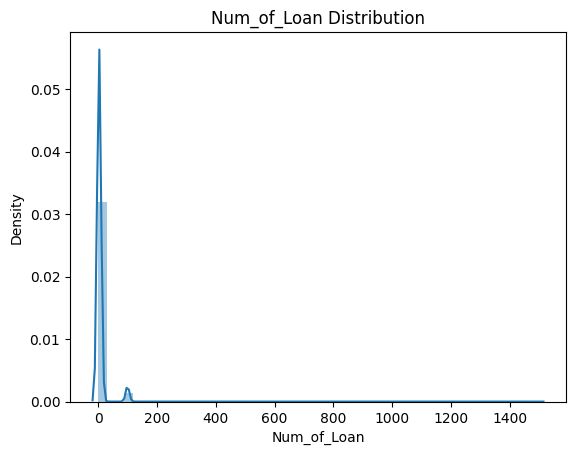

In [41]:
sns.distplot(dataset['Num_of_Loan'])
plt.title('Num_of_Loan Distribution')

In [42]:
dataset.Num_of_Loan.value_counts()

Num_of_Loan
2      13656
3      13646
4      13397
0       9846
1       9557
       ...  
630        1
252        1
745        1
103        1
966        1
Name: count, Length: 372, dtype: int64

#### delete values where number of loans are higher then 40

In [43]:
dataset = dataset[dataset.Num_of_Loan < 40]

In [44]:
dataset = dataset.reset_index(drop=True)

## Changed_Credit_Limit

#### fill missing values

In [45]:
fill_missing_values_by_median('Changed_Credit_Limit')

Changed_Credit_Limit
9.0


#### check again columns with null values:

In [46]:
dataset.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Auto_Loan                   0
Credit_Builder_Loan         0
Personal_Loan               0
Home_Enquity_Loan           0
Mortgage_Loan               0
Student_Loan                0
Debt_Consolidation_Loan     0
Payday_Loan                 0
dtype: int64

#### no more empty cells

## Detect the rest of outliers

In [47]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        print(feature)
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        print(len(outlier_list_col))
        outlier_indices.extend(outlier_list_col) 
        print('-----')
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

cols = [ 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 
        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
outliers_to_drop = detect_outliers(dataset, 2, cols)
#print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

Annual_Income
2399
-----
Monthly_Inhand_Salary
3744
-----
Interest_Rate
1765
-----
Num_of_Loan
12
-----
Delay_from_due_date
3499
-----
Num_of_Delayed_Payment
638
-----
Num_Credit_Inquiries
705
-----
Outstanding_Debt
4550
-----
Credit_Utilization_Ratio
3
-----
Total_EMI_per_month
5891
-----
Amount_invested_monthly
9400
-----
Monthly_Balance
6966
-----


In [48]:
len(outliers_to_drop)

2135

In [49]:
print("Before: {} rows".format(len(dataset)))
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 86546 rows
After: 84411 rows


#### plot distribution for every numerical column:

In [50]:
num_cols = dataset.select_dtypes(include=['int64','float64']).columns

Month


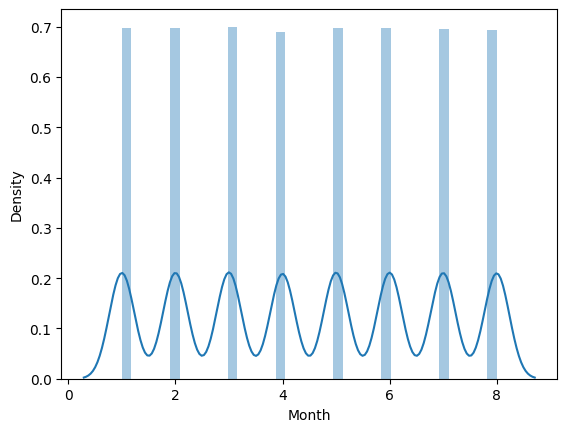

Age


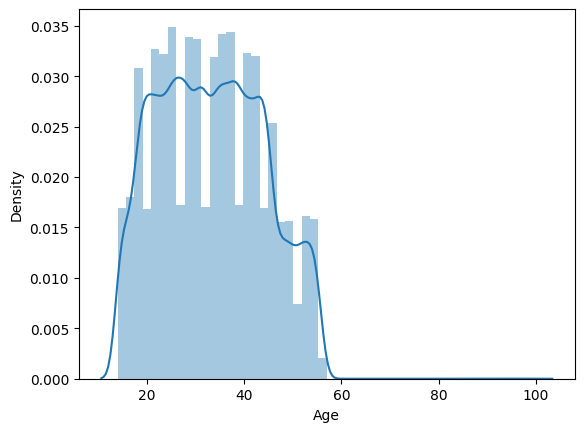

Annual_Income


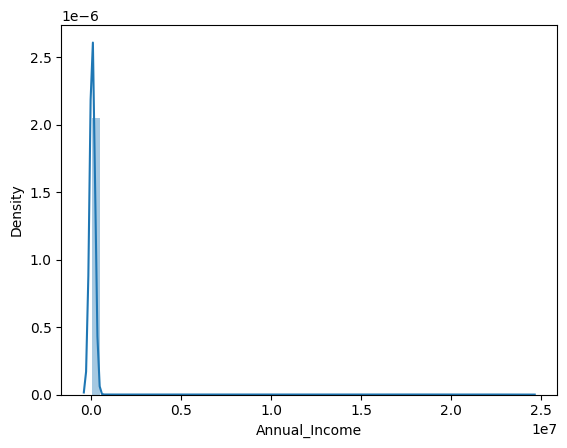

Monthly_Inhand_Salary


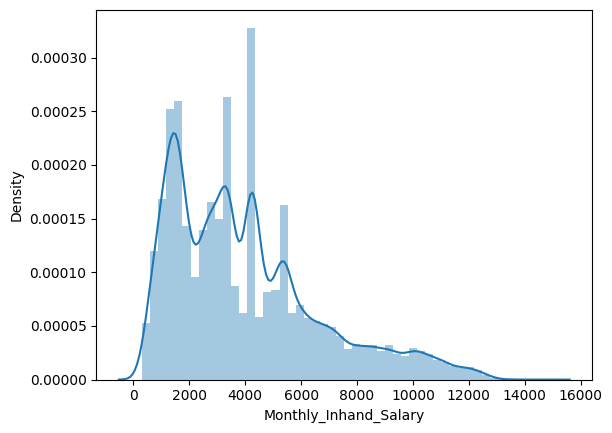

Num_Bank_Accounts


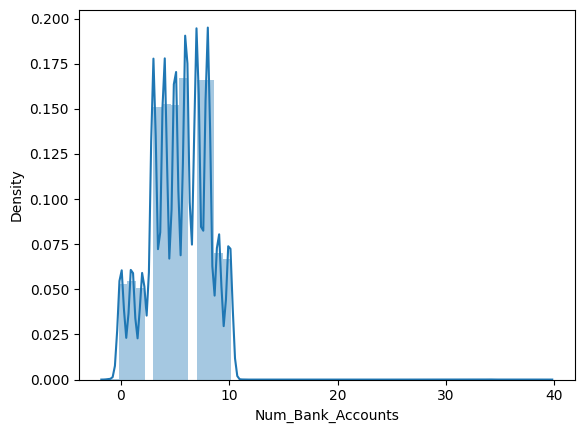

Num_Credit_Card


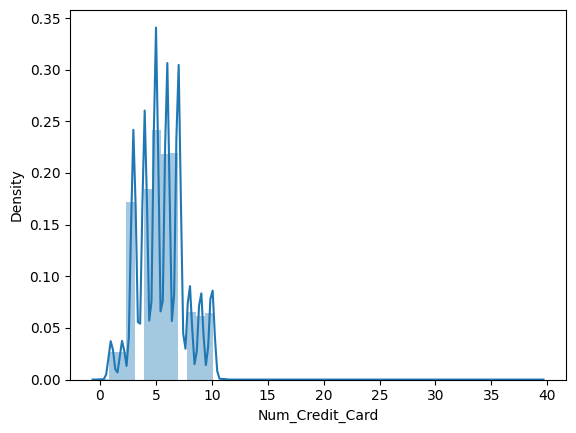

Interest_Rate


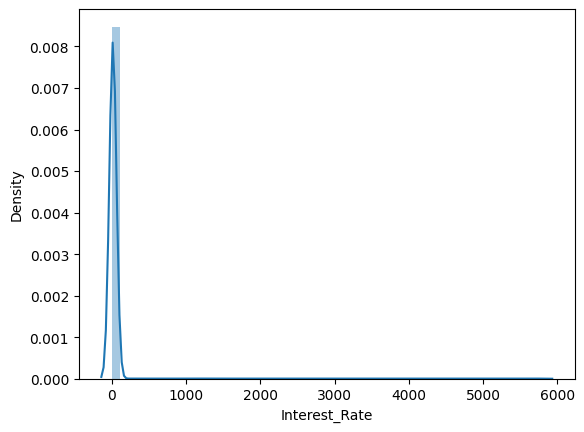

Num_of_Loan


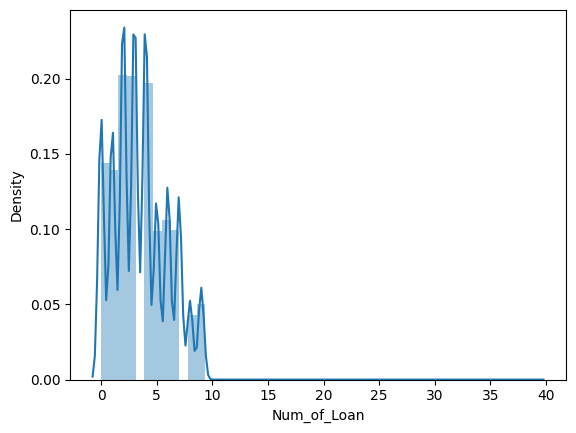

Delay_from_due_date


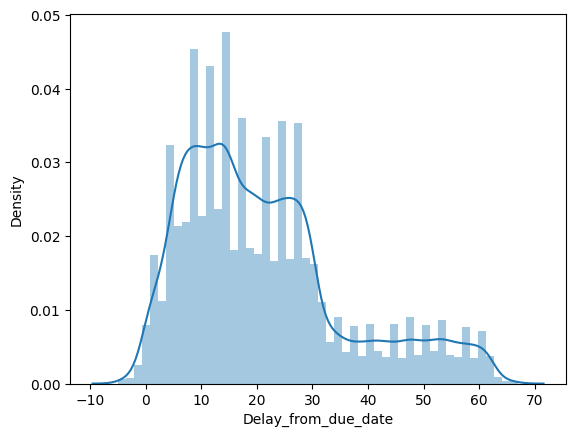

Num_of_Delayed_Payment


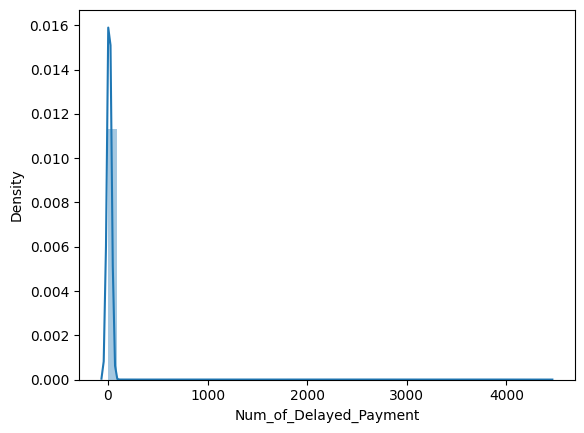

Changed_Credit_Limit


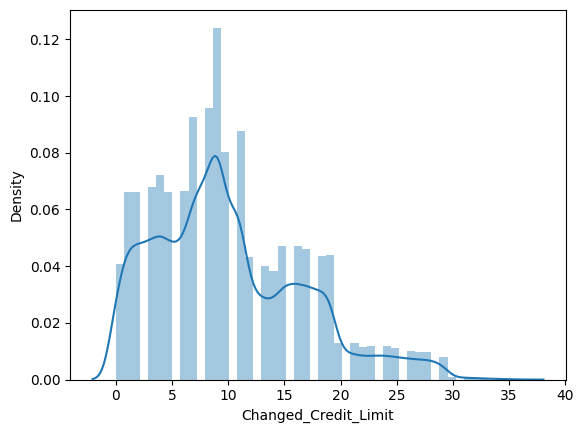

Num_Credit_Inquiries


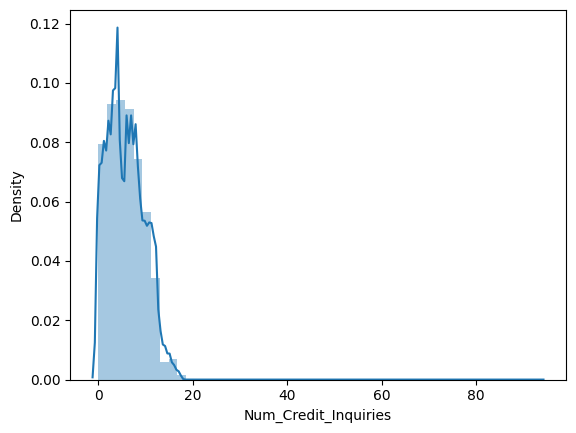

Outstanding_Debt


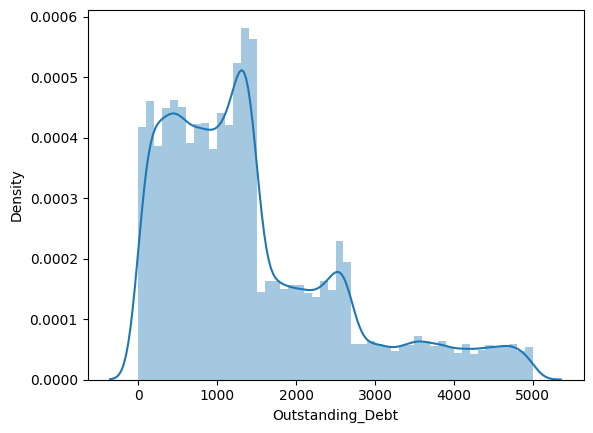

Credit_Utilization_Ratio


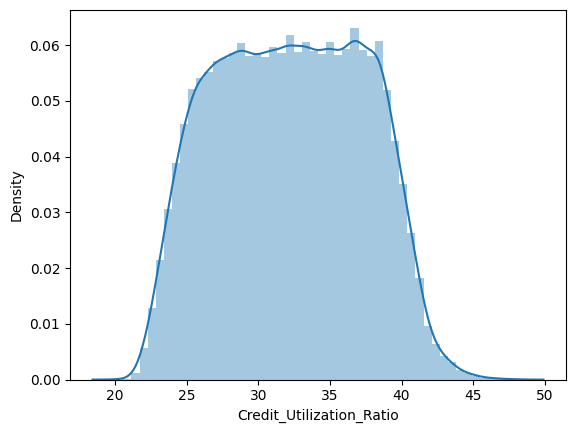

Total_EMI_per_month


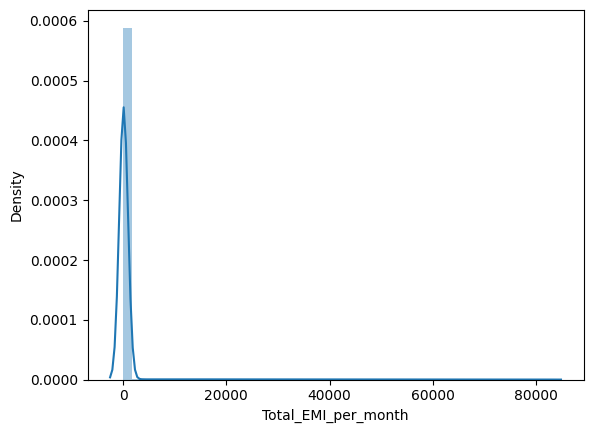

Amount_invested_monthly


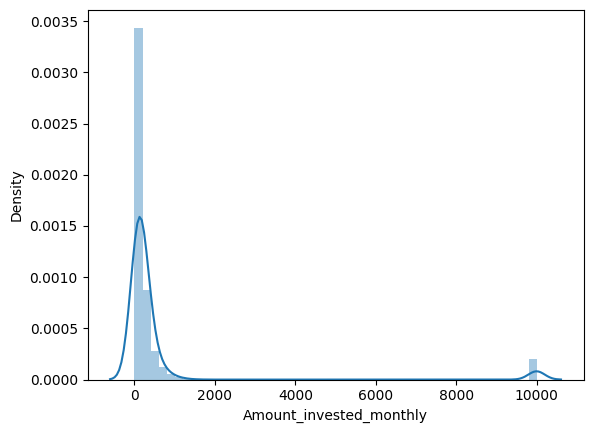

Monthly_Balance


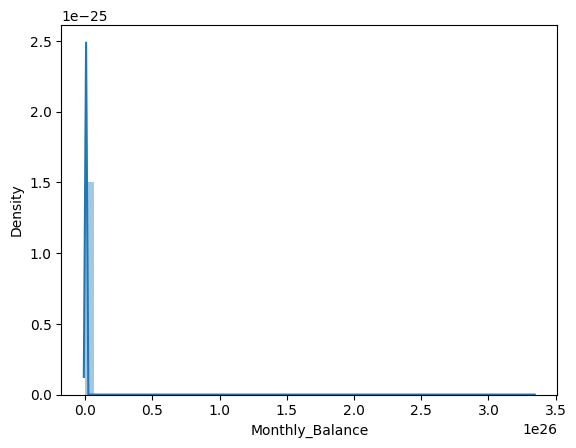

Auto_Loan


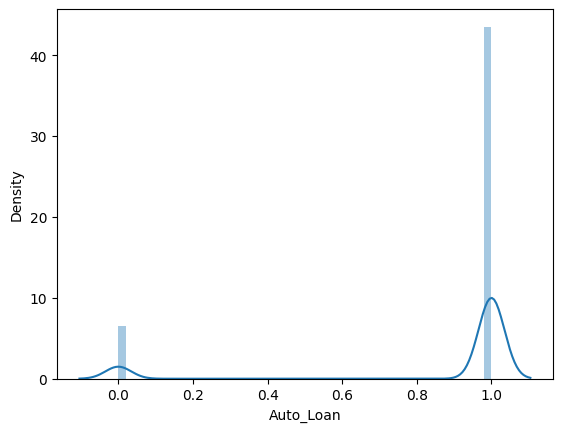

Credit_Builder_Loan


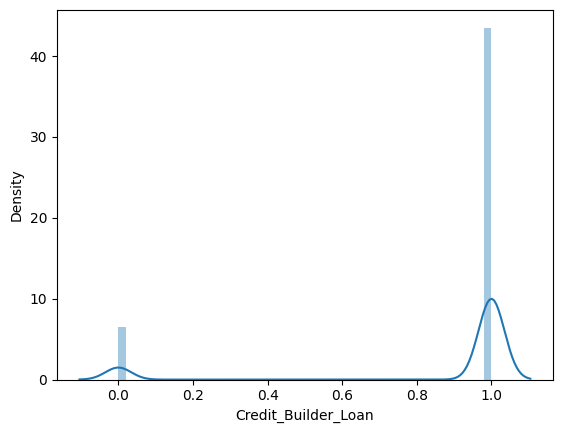

Personal_Loan


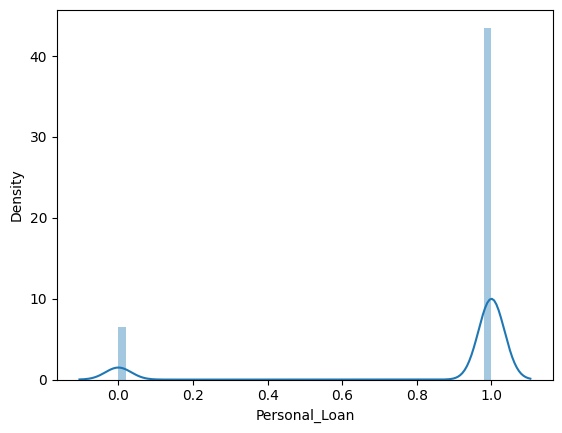

Home_Enquity_Loan


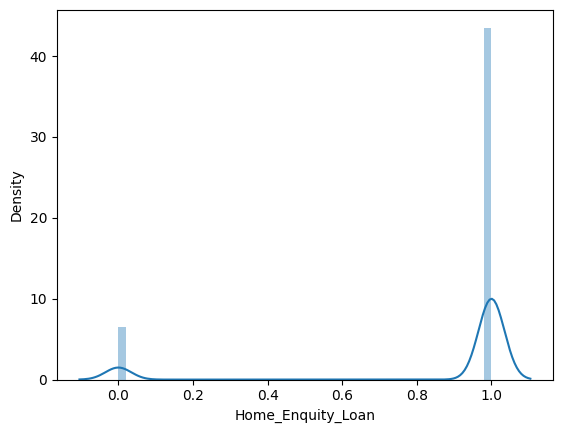

Mortgage_Loan


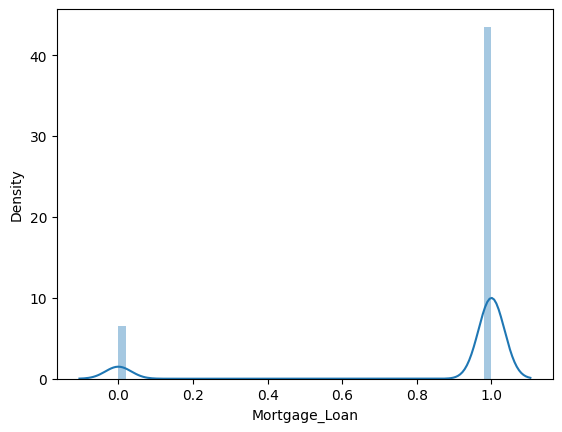

Student_Loan


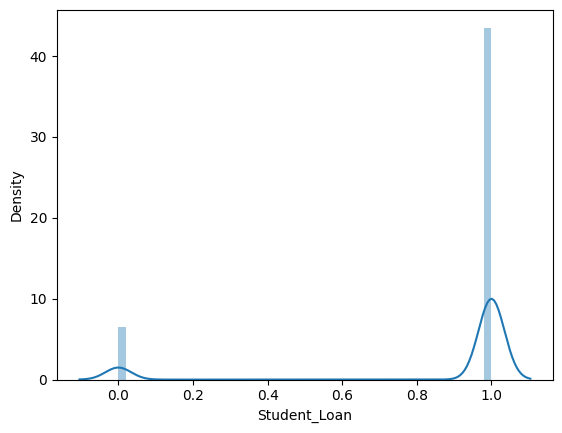

Debt_Consolidation_Loan


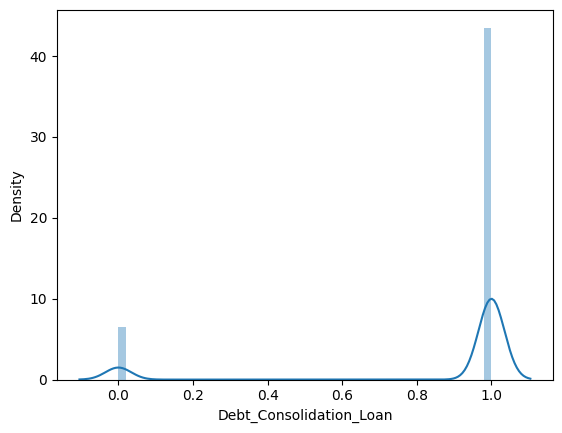

Payday_Loan


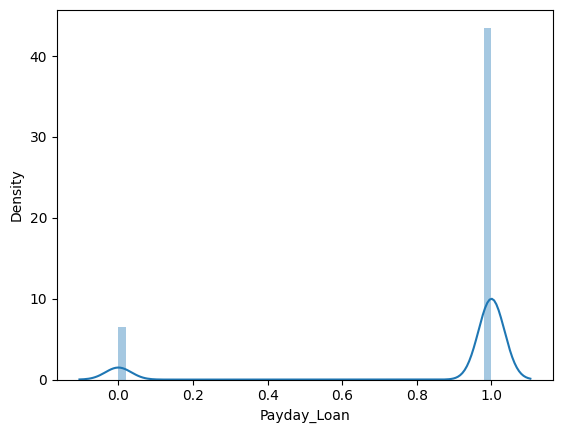

In [51]:
for col in num_cols: 
    print(col)
    sns.distplot(dataset[col])
    plt.show()

#### some columns need log transformation:

Annual_Income


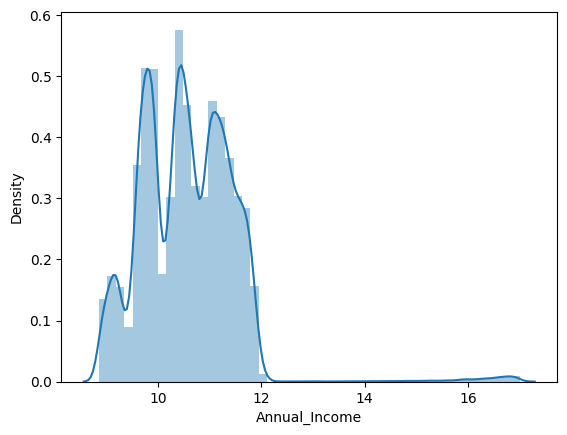

Interest_Rate


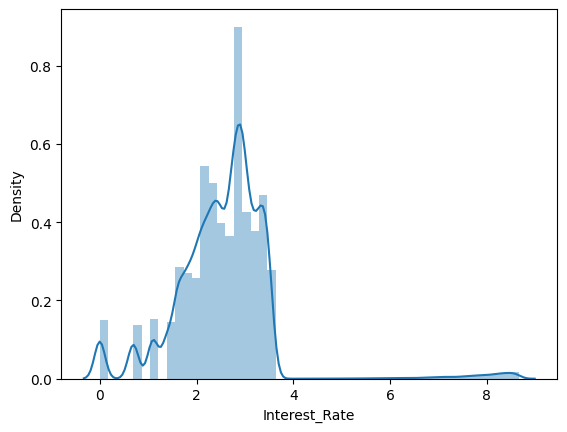

Num_of_Delayed_Payment


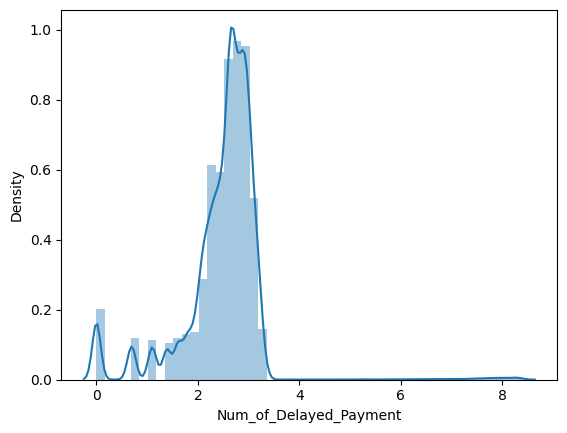

Total_EMI_per_month


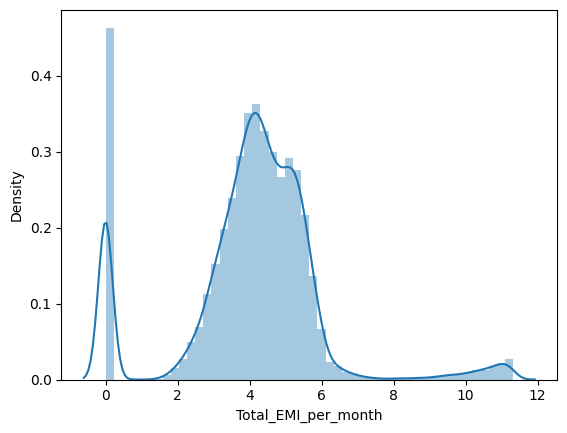

Amount_invested_monthly


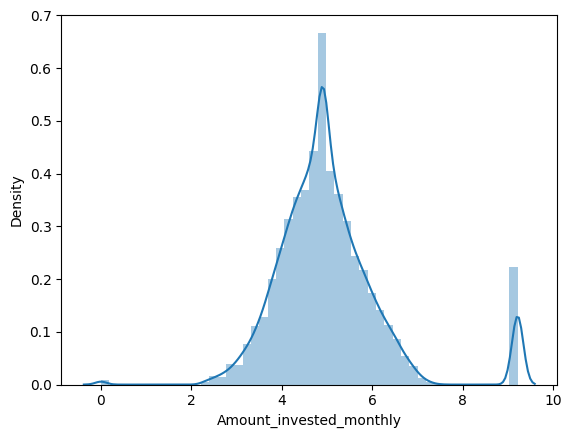

Monthly_Balance


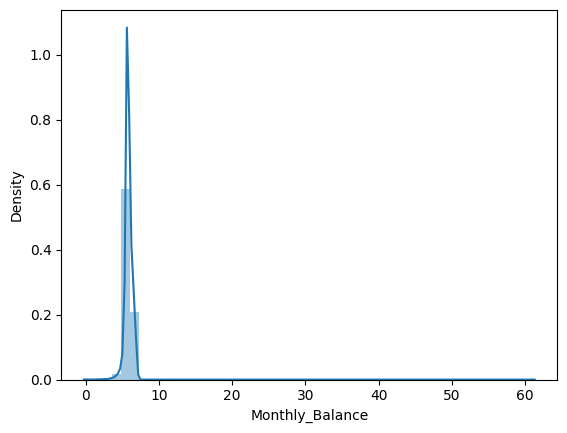

In [52]:
log_transform_list = ['Annual_Income', 'Interest_Rate', 'Num_of_Delayed_Payment', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
for col in log_transform_list:
    log_transforming(col)
    sns.distplot(dataset[col])
    plt.show()

## String features encoding

In [53]:
obj_cols = dataset.select_dtypes(include=['object']).columns

In [54]:
dataset[obj_cols]

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,_,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,No,Low_spent_Small_value_payments,Good
3,Scientist,Good,No,High_spent_Medium_value_payments,Good
4,Scientist,Good,No,!@9#%8,Good
...,...,...,...,...,...
84406,Mechanic,_,No,High_spent_Large_value_payments,Poor
84407,Mechanic,_,No,High_spent_Medium_value_payments,Poor
84408,Mechanic,Good,No,High_spent_Large_value_payments,Poor
84409,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


In [55]:
for col in obj_cols:
    print(dataset[col].value_counts())
    print('---------')

Occupation
_______          5959
Lawyer           5573
Architect        5345
Mechanic         5334
Engineer         5329
Scientist        5327
Teacher          5292
Accountant       5271
Media_Manager    5232
Entrepreneur     5210
Developer        5193
Journalist       5149
Doctor           5131
Manager          5027
Writer           5020
Musician         5019
Name: count, dtype: int64
---------
Credit_Mix
Standard    31415
Good        19660
_           17079
Bad         16257
Name: count, dtype: int64
---------
Payment_of_Min_Amount
Yes    44991
No     29311
NM     10109
Name: count, dtype: int64
---------
Payment_Behaviour
Low_spent_Small_value_payments      21773
High_spent_Medium_value_payments    14873
Low_spent_Medium_value_payments     11584
High_spent_Large_value_payments     11350
High_spent_Small_value_payments      9601
Low_spent_Large_value_payments       8853
!@9#%8                               6377
Name: count, dtype: int64
---------
Credit_Score
Standard    45133
Poor  

In [56]:
label_encoder = LabelEncoder()
for col in obj_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84411 entries, 0 to 84410
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     84411 non-null  int64  
 1   Age                       84411 non-null  int64  
 2   Occupation                84411 non-null  int32  
 3   Annual_Income             84411 non-null  float64
 4   Monthly_Inhand_Salary     84411 non-null  float64
 5   Num_Bank_Accounts         84411 non-null  int64  
 6   Num_Credit_Card           84411 non-null  int64  
 7   Interest_Rate             84411 non-null  float64
 8   Num_of_Loan               84411 non-null  int64  
 9   Delay_from_due_date       84411 non-null  int64  
 10  Num_of_Delayed_Payment    84411 non-null  float64
 11  Changed_Credit_Limit      84411 non-null  float64
 12  Num_Credit_Inquiries      84411 non-null  float64
 13  Credit_Mix                84411 non-null  int32  
 14  Outsta

## Scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
features = dataset.columns.drop('Credit_Score')
features

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan',
       'Home_Enquity_Loan', 'Mortgage_Loan', 'Student_Loan',
       'Debt_Consolidation_Loan', 'Payday_Loan'],
      dtype='object')

In [60]:
dataset[features] = pd.DataFrame(MinMaxScaler().fit_transform(dataset[features]),columns=features)

In [61]:
dataset

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Monthly_Balance,Credit_Score,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Enquity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan
0,0.000000,0.104651,0.8,0.123205,0.105047,0.100,0.102564,0.126806,0.102564,0.111111,...,0.094038,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.142857,0.104651,0.8,0.123205,0.351432,0.100,0.102564,0.126806,0.102564,0.055556,...,0.092498,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.428571,0.104651,0.8,0.123205,0.351432,0.100,0.102564,0.126806,0.102564,0.138889,...,0.088539,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.571429,0.104651,0.8,0.123205,0.105047,0.100,0.102564,0.126806,0.102564,0.152778,...,0.095493,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.714286,0.104651,0.8,0.123205,0.351432,0.100,0.102564,0.126806,0.102564,0.180556,...,0.095445,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84406,0.428571,0.127907,0.6,0.212695,0.211017,0.125,0.153846,0.224605,0.051282,0.388889,...,0.095251,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84407,0.571429,0.127907,0.6,0.212695,0.211017,0.125,0.153846,0.224605,0.051282,0.319444,...,0.095251,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84408,0.714286,0.127907,0.6,0.212695,0.211017,0.125,0.153846,0.998797,0.051282,0.444444,...,0.095251,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84409,0.857143,0.127907,0.6,0.212695,0.211017,0.125,0.153846,0.224605,0.051282,0.347222,...,0.095251,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split into train and test

In [62]:
X = dataset[features]
y = dataset['Credit_Score']

In [63]:
X.shape

(84411, 29)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [65]:
X_train.shape, X_test.shape

((67528, 29), (16883, 29))

## Model building

1. Logistic regression
2. K-nearest neighbours
3. Naive Bayes
4. Random forest

#### method for stats showing

In [66]:
def print_metrics(y_test,y_pred):
    rec = recall_score(y_test, y_pred,average='weighted')
    pr = precision_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    acc = accuracy_score(y_test, y_pred)
    print(f"Recall score {rec}")
    print(f"Precision score {pr}")
    print(f"f1 score {f1}")
    print(f"Accuracy score {acc}")
    print(f"Confusion matrix \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report \n{classification_report(y_test, y_pred)}")
    return rec,pr,f1,acc

In [67]:
metrics = {}

## Logistic Regression

In [68]:
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=[0.1,0.5,1,2],penalty=['l2', 'l1'])
clf = RandomizedSearchCV(lr, distributions, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_

{'penalty': 'l1', 'C': 0.5}

In [69]:
penalty = search.best_params_['penalty']
C = search.best_params_['C']

In [70]:
lr_model = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0, penalty=penalty, C=C)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=200, penalty='l1', random_state=0,
                   solver='saga', tol=0.01)

In [71]:
y_pred = lr_model.predict(X_test)

In [72]:
metrics_lr = print_metrics(y_test, y_pred)
metrics['Logistic Regression'] = metrics_lr

Recall score 0.6376236450867737
Precision score 0.633798815408293
f1 score 0.6267963204272734
Accuracy score 0.6376236450867737
Confusion matrix 
 [[1154   36 1767]
 [ 197 2459 2159]
 [ 715 1244 7152]]
Classification report 
              precision    recall  f1-score   support

           0       0.56      0.39      0.46      2957
           1       0.66      0.51      0.57      4815
           2       0.65      0.78      0.71      9111

    accuracy                           0.64     16883
   macro avg       0.62      0.56      0.58     16883
weighted avg       0.63      0.64      0.63     16883



## K-Nearest Neighbors

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
knn = KNeighborsClassifier()
distributions = dict(n_neighbors=[1,3,5,7,9])
clf = RandomizedSearchCV(knn, distributions, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_

{'n_neighbors': 9}

In [75]:
n_neighbors = search.best_params_['n_neighbors']

In [76]:
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [77]:
y_pred = model_knn.predict(X_test)

In [78]:
metrics_knn = print_metrics(y_test, y_pred)
metrics['K-Nearest Neighbors'] = metrics_knn

Recall score 0.6549191494402653
Precision score 0.6562210325981698
f1 score 0.6546100611960872
Accuracy score 0.6549191494402653
Confusion matrix 
 [[1603  101 1253]
 [ 448 2810 1557]
 [1133 1334 6644]]
Classification report 
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      2957
           1       0.66      0.58      0.62      4815
           2       0.70      0.73      0.72      9111

    accuracy                           0.65     16883
   macro avg       0.62      0.62      0.62     16883
weighted avg       0.66      0.65      0.65     16883



## Gaussian Naive Bayes 

In [79]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [80]:
y_pred = naive_bayes_classifier.predict(X_test)

In [81]:
metrics_nb = print_metrics(y_test, y_pred)
metrics['Gaussian Naive Bayes'] = metrics_nb

Recall score 0.5966949001954629
Precision score 0.6662960545912145
f1 score 0.6012037882562202
Accuracy score 0.5966949001954629
Confusion matrix 
 [[2351   82  524]
 [ 793 3300  722]
 [2677 2011 4423]]
Classification report 
              precision    recall  f1-score   support

           0       0.40      0.80      0.54      2957
           1       0.61      0.69      0.65      4815
           2       0.78      0.49      0.60      9111

    accuracy                           0.60     16883
   macro avg       0.60      0.66      0.59     16883
weighted avg       0.67      0.60      0.60     16883



## Random Forest Classification

In [82]:
rf = RandomForestClassifier(random_state=0)
distributions = dict(n_estimators=[10,50,100,200, 400],max_depth=[2,5,10,15])
clf = RandomizedSearchCV(rf, distributions, random_state=0)
search = clf.fit(X_train, y_train)
search.best_params_

{'n_estimators': 400, 'max_depth': 15}

In [83]:
n_estimators = search.best_params_['n_estimators']
max_depth = search.best_params_['max_depth']

In [84]:
model_rf = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=400)

In [85]:
y_pred = model_rf.predict(X_test)

In [86]:
metrics_rf = print_metrics(y_test, y_pred)
metrics['Random Forest'] = metrics_rf

Recall score 0.7811407925131789
Precision score 0.781367179578486
f1 score 0.781183870197199
Accuracy score 0.7811407925131789
Confusion matrix 
 [[2050   29  878]
 [ 207 3708  900]
 [ 746  935 7430]]
Classification report 
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      2957
           1       0.79      0.77      0.78      4815
           2       0.81      0.82      0.81      9111

    accuracy                           0.78     16883
   macro avg       0.76      0.76      0.76     16883
weighted avg       0.78      0.78      0.78     16883



## Stacking Classifier

In [87]:
base_models = list()

base_models.append(('knn', model_knn))
base_models.append(('naive_bayes', naive_bayes_classifier))
base_models.append(('random_forest', model_rf))

### Define the meta models

meta_model = lr_model

In [88]:
### Applying Stacking Classification

stacking_classifier = StackingClassifier(estimators = base_models, final_estimator = meta_model)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=9)),
                               ('naive_bayes', GaussianNB()),
                               ('random_forest',
                                RandomForestClassifier(max_depth=15,
                                                       n_estimators=400))],
                   final_estimator=LogisticRegression(C=0.5, max_iter=200,
                                                      penalty='l1',
                                                      random_state=0,
                                                      solver='saga', tol=0.01))

In [89]:
y_pred = stacking_classifier.predict(X_test)

In [90]:
metrics_stack= print_metrics(y_test, y_pred)
metrics['Stacking Classifier'] = metrics_stack

Recall score 0.7809038677960078
Precision score 0.7804276025688358
f1 score 0.7802615123481527
Accuracy score 0.7809038677960078
Confusion matrix 
 [[2042   41  874]
 [ 126 3609 1080]
 [ 685  893 7533]]
Classification report 
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      2957
           1       0.79      0.75      0.77      4815
           2       0.79      0.83      0.81      9111

    accuracy                           0.78     16883
   macro avg       0.77      0.76      0.76     16883
weighted avg       0.78      0.78      0.78     16883



## Soft Voting Classifier

In [91]:
estimators = list()

estimators.append(('knn', model_knn))
estimators.append(('naive_bayes', naive_bayes_classifier))
estimators.append(('random_forest', model_rf))

In [92]:
soft_voting_classifier = VotingClassifier(estimators = estimators, voting = 'soft')
soft_voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=9)),
                             ('naive_bayes', GaussianNB()),
                             ('random_forest',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=400))],
                 voting='soft')

In [93]:
y_pred = soft_voting_classifier.predict(X_test)

In [94]:
metrics_voting = print_metrics(y_test, y_pred)
metrics['Soft Voting Classifier'] = metrics_voting

Recall score 0.6776639222886928
Precision score 0.7130135362449296
f1 score 0.6830220290618034
Accuracy score 0.6776639222886928
Confusion matrix 
 [[2281   66  610]
 [ 684 3452  679]
 [1615 1788 5708]]
Classification report 
              precision    recall  f1-score   support

           0       0.50      0.77      0.61      2957
           1       0.65      0.72      0.68      4815
           2       0.82      0.63      0.71      9111

    accuracy                           0.68     16883
   macro avg       0.65      0.70      0.67     16883
weighted avg       0.71      0.68      0.68     16883



## Model evaluation

In [95]:
### Tabulating the results

table = []
table.append(['S.No.', 'Model', 'Recall', 'Precision', 'F1-score', 'Accuracy'])
count = 1
models = ['Logistic Regression','K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Random Forest', 'Stacking Classifier', 'Soft Voting Classifier']
for model in models:
    row = [count, model, metrics[model][0], metrics[model][1], metrics[model][2], metrics[model][3]]
    table.append(row)
    count += 1
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤════════════════════════╤══════════╤═════════════╤════════════╤════════════╕
│   S.No. │ Model                  │   Recall │   Precision │   F1-score │   Accuracy │
╞═════════╪════════════════════════╪══════════╪═════════════╪════════════╪════════════╡
│       1 │ Logistic Regression    │ 0.637624 │    0.633799 │   0.626796 │   0.637624 │
├─────────┼────────────────────────┼──────────┼─────────────┼────────────┼────────────┤
│       2 │ K-Nearest Neighbors    │ 0.654919 │    0.656221 │   0.65461  │   0.654919 │
├─────────┼────────────────────────┼──────────┼─────────────┼────────────┼────────────┤
│       3 │ Gaussian Naive Bayes   │ 0.596695 │    0.666296 │   0.601204 │   0.596695 │
├─────────┼────────────────────────┼──────────┼─────────────┼────────────┼────────────┤
│       4 │ Random Forest          │ 0.781141 │    0.781367 │   0.781184 │   0.781141 │
├─────────┼────────────────────────┼──────────┼─────────────┼────────────┼────────────┤
│       5 │ Stacking Classifier 

## Conclusion

The best models are Random Forest and Stacking Classifier. They provides accuracy of 78 percent, precision of 78 percent, recall of 78 percent and f1 of percent.